In [1]:
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('agaricus-lepiota.csv')

le = LabelEncoder()
y = le.fit_transform(data['edibility'])

x = pd.get_dummies(data.drop(columns=['edibility']))

print("X shape:", x.shape)
print("y shape:", y.shape)

skb = SelectKBest(chi2, k=5)
skb.fit(x, y)
x_new = skb.transform(x)

print("x_new shape:", x_new.shape)

selected = [x.columns[i] for i in skb.get_support(indices=True)]
print("Best features to decide edibility:", ", ".join(selected))


X shape: (8124, 117)
y shape: (8124,)
x_new shape: (8124, 5)
Best features to decide edibility: odor_f, odor_n, gill-color_b, stalk-surface-above-ring_k, stalk-surface-below-ring_k


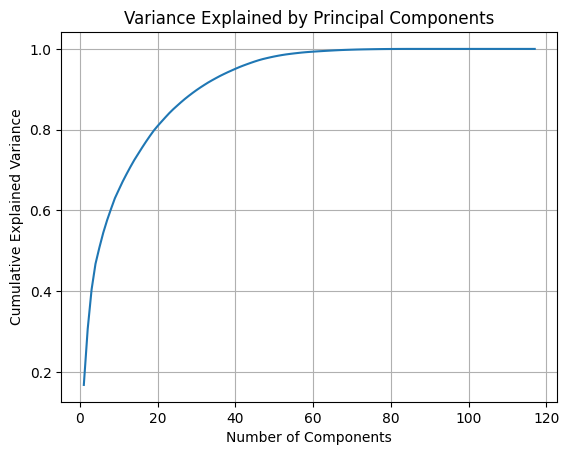

Principal Component 1:
- Most influential feature: ring-type_p
- Explained Variance: 0.1681
- Cumulative Explained Variance: 0.1681

Principal Component 2:
- Most influential feature: spore-print-color_h
- Explained Variance: 0.1389
- Cumulative Explained Variance: 0.3070

Principal Component 3:
- Most influential feature: habitat_d
- Explained Variance: 0.0974
- Cumulative Explained Variance: 0.4045

Principal Component 4:
- Most influential feature: stalk-shape_t
- Explained Variance: 0.0634
- Cumulative Explained Variance: 0.4679

Principal Component 5:
- Most influential feature: odor_n
- Explained Variance: 0.0402
- Cumulative Explained Variance: 0.5080


In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Creating PC components
pca = PCA(n_components=min(x.shape))
x_pca = pca.fit_transform(x)

# Plotting the variance based on cumulative variance in principal components
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum())
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Variance Explained by Principal Components")
plt.grid(True)
plt.show()

feature_names = x.columns

num_pcs_to_inspect = 5

# Showing the most influential feature of the 5 first PC's
for i in range(num_pcs_to_inspect):
    pc = pca.components_[i, :]
    most_important_idx = np.abs(pc).argmax()
    most_important_feature = feature_names[most_important_idx]

    print(f"Principal Component {i + 1}:")
    print(f"- Most influential feature: {most_important_feature}")
    print(f"- Explained Variance: {pca.explained_variance_ratio_[i]:.4f}")
    print(f"- Cumulative Explained Variance: {pca.explained_variance_ratio_[:i + 1].sum():.4f}\n")